In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
from api_keys import weath_api_key

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

In [4]:
units = 'imperial'

In [5]:
url =  "http://api.openweathermap.org/data/2.5/weather?"

In [6]:
query_url = f"{url}&units={units}&appid={weath_api_key}&q="

In [7]:
test = requests.get(query_url+cities[12]).json()

In [8]:
test

{'coord': {'lon': -2.2405, 'lat': 4.8699},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 77.83,
  'feels_like': 79.16,
  'temp_min': 77.83,
  'temp_max': 77.83,
  'pressure': 1012,
  'humidity': 82,
  'sea_level': 1012,
  'grnd_level': 1010},
 'visibility': 10000,
 'wind': {'speed': 7.96, 'deg': 228, 'gust': 10},
 'clouds': {'all': 100},
 'dt': 1624329259,
 'sys': {'country': 'GH', 'sunrise': 1624341530, 'sunset': 1624386183},
 'timezone': 0,
 'id': 2303611,
 'name': 'Esim',
 'cod': 200}

In [9]:
test['coord']['lat']

4.8699

In [10]:
# Perform API Calls
lat = []
lng = []
temp =[]
humidity = []
cloud = []
windsped = []
processed_cities = []
date = []
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        windsped.append(response['wind']['speed'])
        date.append(response['dt'])
        processed_cities.append(city)
        print(f"{city} found! Processing" )
    except:
        print("city not found")
        
        pass
#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it'sbeing processed (with the city number and city name).

vaini found! Processing
cabo san lucas found! Processing
lavrentiya found! Processing
qaqortoq found! Processing
lucapa found! Processing
butaritari found! Processing
city not found
vila velha found! Processing
riyadh found! Processing
kazanskoye found! Processing
dikson found! Processing
port elizabeth found! Processing
axim found! Processing
kwinana found! Processing
city not found
castro found! Processing
tasiilaq found! Processing
fortuna found! Processing
city not found
ampanihy found! Processing
mar del plata found! Processing
city not found
puerto escondido found! Processing
jamestown found! Processing
sao filipe found! Processing
oliver found! Processing
sandpoint found! Processing
arraial do cabo found! Processing
emmett found! Processing
busselton found! Processing
rikitea found! Processing
bilibino found! Processing
luba found! Processing
taltal found! Processing
gornopravdinsk found! Processing
tucuman found! Processing
ushuaia found! Processing
sur found! Processing
gerald

In [11]:
len(processed_cities)

544

In [12]:
len(windsped)

544

In [13]:
weather_data = pd.DataFrame({
    "city": processed_cities,
    "lat": lat,
    "lng": lng,
    "temp": temp,
    "humidity": humidity,
    "cloudiness": cloud,
    "windspeed": windsped,
    'date': date
})


In [14]:
weather_data

,city,lat,lng,temp,humidity,cloudiness,windspeed,date
0,vaini,-21.2000,-175.2000,80.76,78,20,13.80,1624329259
1,cabo san lucas,22.8909,-109.9124,78.42,68,1,26.46,1624329005
2,lavrentiya,65.5833,-171.0000,48.24,71,97,4.21,1624329260
3,qaqortoq,60.7167,-46.0333,46.90,89,100,2.10,1624329260
4,lucapa,-8.4192,20.7447,61.16,52,53,4.72,1624329260
...,...,...,...,...,...,...,...,...
539,chingirlau,51.0950,54.0814,75.58,48,0,0.63,1624329401
540,makokou,0.5738,12.8642,69.03,98,100,2.13,1624329401
541,torrevieja,37.9787,-0.6822,73.09,45,0,5.01,1624329401
542,svetlyy,54.6750,20.1347,68.05,85,1,6.13,1624329402


In [15]:
#Convert Raw Data to DataFrame
weather_data.to_csv(output_data_file, index=False)
#Export the city data into a .csv.
#Display the DataFrame

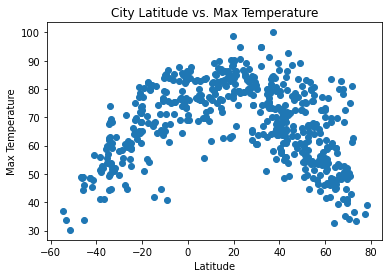

In [16]:
plt.scatter(weather_data['lat'], weather_data['temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title("City Latitude vs. Max Temperature")
plt.show()

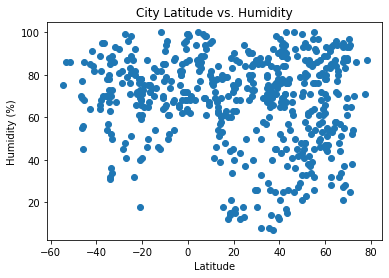

In [17]:
plt.scatter(weather_data['lat'], weather_data['humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs. Humidity")
plt.show()

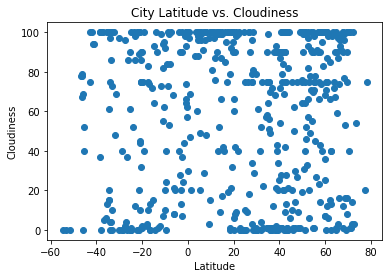

In [18]:
plt.scatter(weather_data['lat'], weather_data['cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("City Latitude vs. Cloudiness")
plt.show()

In [35]:
northern_hemisphere = weather_data[weather_data['lat'] >=0]
southern_hemisphere =weather_data[weather_data['lat']<=0]


In [33]:
def linregression(x,y,title,coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x*slope + intercept
    line_eq = 'y =' + str(round(slope, 2)) + 'x+' +str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x, regress_values, 'r-')
    plt.annotate(line_eq, coordinates, fontsize=10, color='red')
    plt.xlabel('Latitude')
    plt.ylabel(title)
    plt.show()


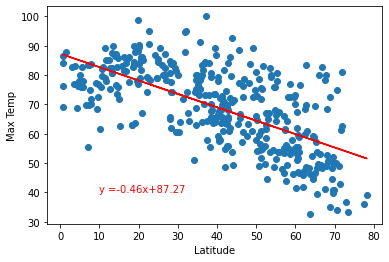

In [38]:
x=northern_hemisphere['lat']
y=northern_hemisphere['temp']
linregression(x,y,"Max Temp",(10,40))

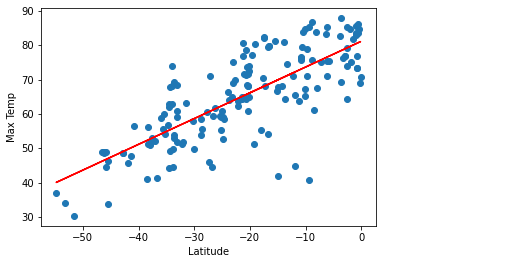

In [58]:
x=southern_hemisphere['lat']
y=southern_hemisphere['temp']
linregression(x,y,"Max Temp",(10,60))

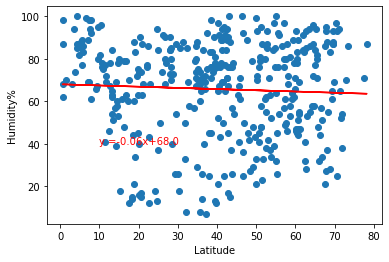

In [40]:
x=northern_hemisphere['lat']
y=northern_hemisphere['humidity']
linregression(x,y,"Humidity%",(10,40))

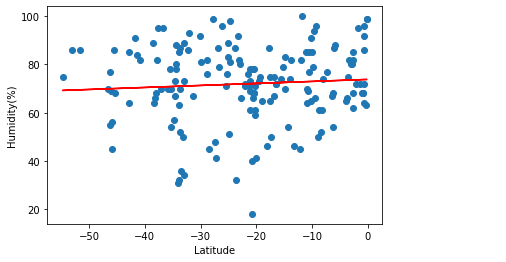

In [56]:
x=southern_hemisphere['lat']
y=southern_hemisphere['humidity']
linregression(x,y,"Humidity(%)",(10,15))

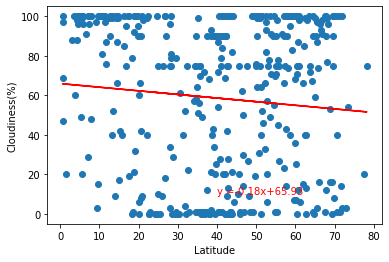

In [54]:
x=northern_hemisphere['lat']
y=northern_hemisphere['cloudiness']
linregression(x,y,"Cloudiness(%)",(40,10))

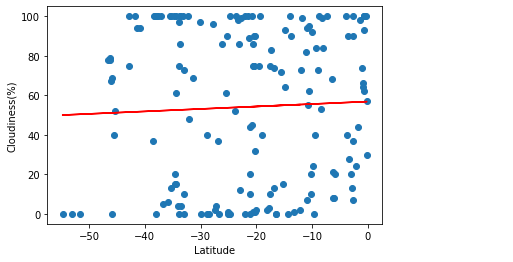

In [63]:
x=southern_hemisphere['lat']
y=southern_hemisphere['cloudiness']
linregression(x,y,"Cloudiness(%)",(10,15))

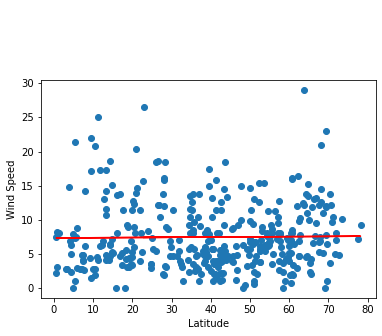

In [65]:
x=northern_hemisphere['lat']
y=northern_hemisphere['windspeed']
linregression(x,y,"Wind Speed",(10,40))

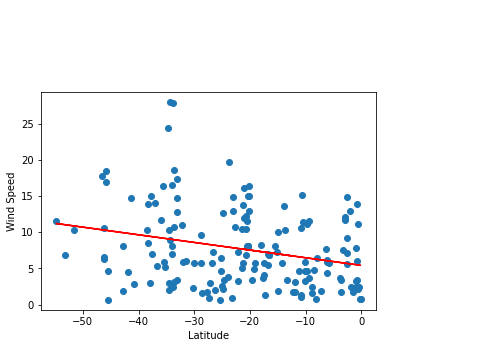

In [67]:
x=southern_hemisphere['lat']
y=southern_hemisphere['windspeed']
linregression(x,y,"Wind Speed",(10,40))